# Data Preparation for Machine Learning and Deep Learning

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import duckdb as db
# LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, TargetEncoder
from sklearn.model_selection import train_test_split

In [240]:
df=pd.read_parquet("../data/cleaned/dataset.parquet")

In [241]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_year', 'created_at_month',
       'created_at_day', 'created_at_hour', 'created_at_minute',
       'created_at_second', 'actual_delivery_time_year',
       'actual_delivery_time_month', 'actual_delivery_time_day',
       'actual_delivery_time_hour', 'actual_delivery_time_minute',
       'actual_delivery_time_second', 'created_at_month_name',
       'actual_delivery_time_month_name', 'created_at_day_of_week',
       'actual_delivery_time_day_of_week', 'created_at_day_name',
       'actual_delivery_time_day_name', 'created_at_week_number',
       'actual_delivery_time_week_number', 'created_at_week_of_month',
       'actual_delivery_time_week_of_month', 'delivery_time_seconds',

In [242]:
to_drop = [
     'created_at', 'actual_delivery_time', 'store_id',
     'created_at_year', 'created_at_month',
       'created_at_second', 'actual_delivery_time_year',
       'actual_delivery_time_month', 'actual_delivery_time_day',
       'actual_delivery_time_hour', 'actual_delivery_time_minute',
       'actual_delivery_time_second', 'created_at_month_name',
       'actual_delivery_time_month_name', 
       'actual_delivery_time_day_of_week', 'created_at_day_name',
       'actual_delivery_time_day_name', 'created_at_week_number',
       'actual_delivery_time_week_number', 
       'actual_delivery_time_week_of_month', 'delivery_time_seconds',
]

In [243]:
df = df.drop(columns=to_drop)
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_day', 'created_at_hour',
       'created_at_minute', 'created_at_day_of_week',
       'created_at_week_of_month', 'delivery_time_minutes'],
      dtype='object')

In [244]:
df=df.drop_duplicates()

In [245]:
df.shape

(177544, 17)

In [246]:
df=df[df["total_items"] < 100]
df=df[df["delivery_time_minutes"] < 200]
df=df[df["max_item_price"] < 10000]
df=df[df["min_item_price"] < 10000]
df=df[df["subtotal"] < 15000]

In [247]:
df.shape

(177445, 17)

In [248]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_day,created_at_hour,created_at_minute,created_at_day_of_week,created_at_week_of_month,delivery_time_minutes
0,1.0,american,1,4,3441,4,557.0,1239.0,33.0,14.0,21.0,6,16,54,5,1,62
1,2.0,mexican,2,1,1900,1,1400.0,1400.0,1.0,2.0,2.0,10,16,19,2,2,67
2,3.0,other,1,1,1900,1,1900.0,1900.0,1.0,0.0,0.0,22,15,9,4,4,29
3,3.0,other,1,6,6900,5,600.0,1800.0,1.0,1.0,2.0,3,15,51,2,1,51
4,3.0,other,1,3,3900,3,1100.0,1600.0,6.0,6.0,9.0,14,21,10,6,2,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177539,1.0,fast,4,3,1389,3,345.0,649.0,17.0,17.0,23.0,16,18,49,1,3,65
177540,1.0,fast,4,6,3010,4,405.0,825.0,12.0,11.0,14.0,12,18,31,4,2,56
177541,1.0,fast,4,5,1836,3,300.0,399.0,39.0,41.0,40.0,23,23,16,5,4,50
177542,1.0,sandwich,1,1,1175,1,535.0,535.0,7.0,7.0,12.0,1,12,48,7,1,65


Text(0.5, 1.0, 'Correlation Heatmap')

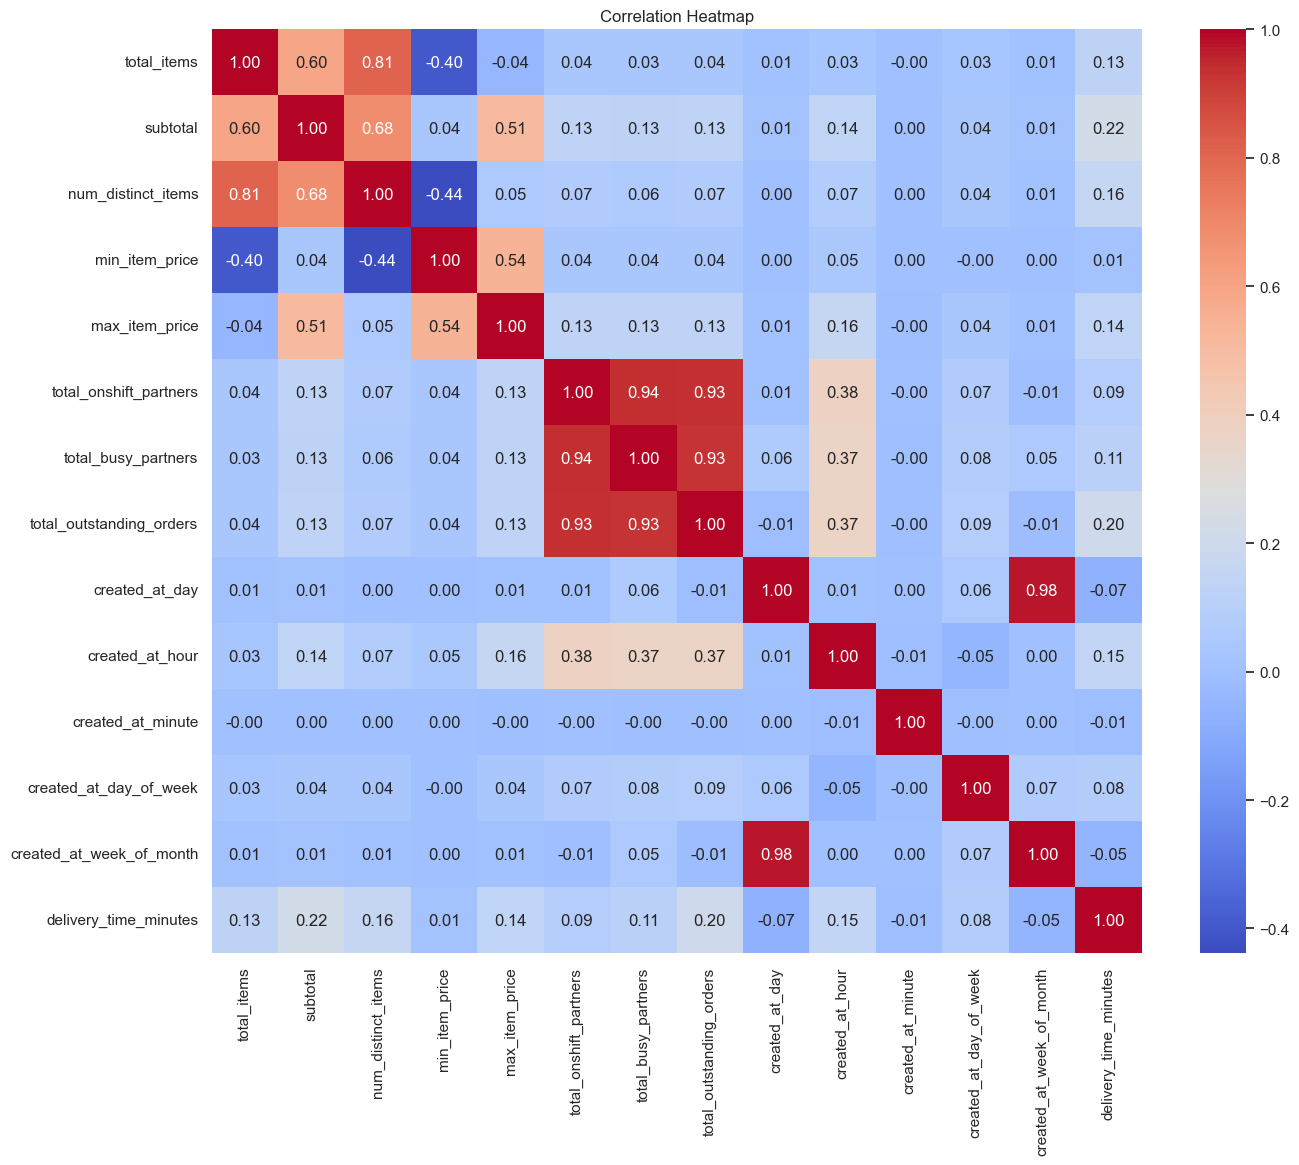

In [253]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.drop(['market_id', 'store_primary_category', 'order_protocol'], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")

In [254]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_day', 'created_at_hour',
       'created_at_minute', 'created_at_day_of_week',
       'created_at_week_of_month', 'delivery_time_minutes'],
      dtype='object')

In [257]:
df[["created_at_day", "created_at_week_of_month"]].sample(20)

,created_at_day,created_at_week_of_month
2550,21,3
77783,6,1
103017,15,3
151808,8,2
131244,13,2
169856,30,5
164445,17,3
168179,8,2
14103,22,4
76826,1,1


In [217]:
cat_df = df["store_primary_category"].value_counts().reset_index().rename(columns={ 'store_primary_category': 'category'})
cat_df

,category,count
0,american,18086
1,pizza,15693
2,mexican,15608
3,burger,9846
4,sandwich,8991
...,...,...
68,african,10
69,lebanese,9
70,belgian,2
71,chocolate,1


In [218]:
df=df.merge(cat_df, left_on="store_primary_category", right_on="category", how="left")

In [219]:
df["store_primary_category"] = np.where(df["count"] < 20, "other", df["store_primary_category"])

In [220]:
df=df.drop(columns=["category", "count"])

In [221]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_day', 'created_at_hour',
       'created_at_minute', 'created_at_day_of_week',
       'created_at_week_of_month', 'delivery_time_minutes'],
      dtype='object')

In [222]:
all_cols=['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_day', 'created_at_hour',
       'created_at_minute', 'created_at_day_of_week',
       'created_at_week_of_month', 'delivery_time_minutes']

date_time_cols = [ 'created_at_hour', 'created_at_minute',
    'created_at_day_of_week'
]

def convert_cyclical(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val).round(8)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val).round(8)
    return df

In [223]:
for col in date_time_cols:
    df = convert_cyclical(df, col, df[col].max())

df = df.drop(columns=date_time_cols)

In [224]:
category_label_encoder = LabelEncoder()
df['store_primary_category_le'] = category_label_encoder.fit_transform(df['store_primary_category'])

In [225]:
order_protocol_onehot_encoder = OneHotEncoder(sparse_output=False)
order_protocol_onehot = order_protocol_onehot_encoder.fit_transform(df[['order_protocol']])
order_protocol_onehot_df = pd.DataFrame(order_protocol_onehot, columns=order_protocol_onehot_encoder.get_feature_names_out(['order_protocol']))
df = pd.concat([df, order_protocol_onehot_df], axis=1)
df = df.drop(columns=['order_protocol'])

market_id_onehot_encoder = OneHotEncoder(sparse_output=False)
market_id_onehot = market_id_onehot_encoder.fit_transform(df[['market_id']])
market_id_onehot_df = pd.DataFrame(market_id_onehot, columns=market_id_onehot_encoder.get_feature_names_out(['market_id']))
df = pd.concat([df, market_id_onehot_df], axis=1)
df = df.drop(columns=['market_id'])

In [226]:
df

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_day,...,order_protocol_4,order_protocol_5,order_protocol_6,order_protocol_7,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,american,4,3441,4,557.0,1239.0,33.0,14.0,21.0,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,mexican,1,1900,1,1400.0,1400.0,1.0,2.0,2.0,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,other,1,1900,1,1900.0,1900.0,1.0,0.0,0.0,22,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,other,6,6900,5,600.0,1800.0,1.0,1.0,2.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,other,3,3900,3,1100.0,1600.0,6.0,6.0,9.0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177440,fast,3,1389,3,345.0,649.0,17.0,17.0,23.0,16,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
177441,fast,6,3010,4,405.0,825.0,12.0,11.0,14.0,12,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
177442,fast,5,1836,3,300.0,399.0,39.0,41.0,40.0,23,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
177443,sandwich,1,1175,1,535.0,535.0,7.0,7.0,12.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [227]:
X=df.drop(columns=['delivery_time_minutes'])
y=df['delivery_time_minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((124211, 31), (26617, 31), (26617, 31), (124211,), (26617,), (26617,))

In [228]:
category_target_encoder = TargetEncoder(target_type="continuous")
X_train["store_primary_category"]=category_target_encoder.fit_transform(X_train[['store_primary_category']], y_train)
X_val["store_primary_category"]=category_target_encoder.transform(X_val[['store_primary_category']])
X_test["store_primary_category"]=category_target_encoder.transform(X_test[['store_primary_category']])

In [229]:
X_train_store_category_le = X_train.pop('store_primary_category_le')
X_val_store_category_le = X_val.pop('store_primary_category_le')
X_test_store_category_le = X_test.pop('store_primary_category_le')

In [230]:
X_train.shape

(124211, 30)

In [231]:
cols=X_train.columns

In [232]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [233]:
X_train.shape

(124211, 30)

In [234]:
X_train = pd.DataFrame(X_train, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [235]:
import pickle

with open('../data/processed/dataset.pkl', 'wb') as f:
    pickle.dump({'X_train': X_train, 
                 'y_train': y_train, 
                 'X_val': X_val, 
                 'y_val': y_val, 
                 'X_test': X_test, 
                 'y_test': y_test, 
                 'X_train_store_category_le': X_train_store_category_le,
                 'X_val_store_category_le': X_val_store_category_le, 
                 'X_test_store_category_le': X_test_store_category_le
                 },
                 f)

In [236]:
with open('../data/processed/dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [237]:
dataset.keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test', 'X_train_store_category_le', 'X_val_store_category_le', 'X_test_store_category_le'])

In [238]:
df.to_parquet("../data/processed/dataset.parquet", index=False)

In [239]:
X_train

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_day,...,order_protocol_4,order_protocol_5,order_protocol_6,order_protocol_7,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,-1.321706,-0.083488,-0.728377,0.197429,-1.052785,-0.562860,-0.604955,-0.582900,-0.518799,-1.024156,...,-0.328540,-0.553073,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
1,0.129194,-0.083488,0.529496,0.197429,0.165332,0.057817,1.668653,1.546290,1.287496,-0.485997,...,-0.328540,-0.553073,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
2,0.097884,-0.886190,-0.505914,-1.034719,1.373705,0.417630,1.697802,1.139239,1.572701,-0.916524,...,-0.328540,-0.553073,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
3,0.097884,-0.886190,-1.322159,-1.034719,-1.006009,-1.779028,1.668653,1.389732,1.553687,0.805585,...,3.043768,-0.553073,-0.056338,-0.0117,-0.501884,1.492571,-0.363333,-0.603731,-0.336232,-0.060702
4,0.066985,-0.083488,-0.304325,0.197429,-0.906611,0.424826,-1.042188,-1.021262,-0.937100,-0.270733,...,-0.328540,-0.553073,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124206,0.057620,-0.083488,0.004925,0.197429,0.009413,-0.122089,1.085677,0.481695,1.211442,1.559007,...,-0.328540,1.808080,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
124207,0.097884,-0.484839,-0.401549,-0.418645,0.009413,0.201742,-1.275378,-1.271755,-1.070195,-0.916524,...,-0.328540,-0.553073,-0.056338,-0.0117,-0.501884,-0.669985,2.752298,-0.603731,-0.336232,-0.060702
124208,-0.159570,0.719214,0.754705,1.429577,-0.575283,-0.122089,0.735891,0.794811,0.926237,-0.485997,...,3.043768,-0.553073,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
124209,-1.326591,0.317863,-0.302677,0.197429,-0.857886,-0.607837,1.377165,1.201862,1.135387,0.590321,...,-0.328540,1.808080,-0.056338,-0.0117,-0.501884,-0.669985,-0.363333,1.656367,-0.336232,-0.060702
